<a href="https://colab.research.google.com/github/ykitaguchi77/GO_AI_project/blob/main/make_super_extend_dataset_for_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Create extended dataset for YOLOv5 implementation**

#Olympia
„ÉªOlympia dataset

Treated 640px: 561Êûö„ÄÇ„ÉÜ„Çπ„Éà„Å´50Êûö„ÇíÊÆã„ÅôÔºàtest_olympiaÔºâ„ÄÅÊÆã„Çä„ÅÆ511Êûö„Çítrain/val„Å´Âõû„Åô

Control 640px: 169Êûö„ÄÇ„ÉÜ„Çπ„Éà„Å´50Êûö„ÇíÊÆã„Åô(test_control)„ÄÅÊÆã„Çä„ÅÆ119Êûö„Çítrain/val„Å´Âõû„Åô

#Handai
„ÉªGO_extended_dataset

control: 1886Êûö„ÄÇ„ÉÜ„Çπ„Éà„Å´50Êûö„ÇíÊÆã„Åô(test_handai)„ÄÅÊÆã„Çä„ÅÆ1836Êûö„Çítrain/val„Å´Âõû„Åô

treatable: 1879Êûö„ÄÇ„ÉÜ„Çπ„Éà„Å´50Êûö„ÇíÊÆã„Åô(test_handai)„ÄÅÊÆã„Çä„ÅÆ1829Êûö„Çítrain/val„Å´Âõû„Åô


#ÂêàË®àÔºö
treatable: 1829 + 119

control: 1836 + 511

testset: Olympia treated 50, control 50, Handai treated 50, control 50

##Êó¢Â≠ò„ÅÆYOLO„Åßbounding box„Çí‰ΩúÊàê --> class„ÅØÊó¢Áü•„ÅÆ„ÇÇ„ÅÆ„Åß„ÄÇGlaucoma„ÅÆrepository„ÇíÂèÇËÄÉ„Å´„Åó„Å¶YOLO dataset„Çí‰ΩúÊàê„ÄÇ

In [1]:
import pandas as pd
import os
import glob
import shutil
import glob
import random
from PIL import Image
import time
%matplotlib inline

#„Çµ„Éù„Éº„Éà„Éë„ÉÉ„ÉÅ„ÅÆ„Ç§„É≥„Éù„Éº„Éà
from google.colab.patches import cv2_imshow
import cv2


# Google Drive„Çí„Éû„Ç¶„É≥„Éà
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#„Éï„Ç°„Ç§„É´Êï∞Á¢∫Ë™çÁî®
import os

def countfile(name, path):
    print(f"path: {path}")
    print(f"number: {len(os.listdir(path))}")
    print("")

if not os.path.exists("/content/GO_extended_dataset"):
    !unzip /content/drive/MyDrive/Deep_learning/GO_extended_dataset/GO_extended_dataset.zip -d /content/


olympia_cont_dir = "/content/drive/MyDrive/Deep_learning/Olympia_dataset/control_640px"
olympia_grav_dir = "/content/drive/MyDrive/Deep_learning/Olympia_dataset/treated_640px"
handai_cont_dir = "/content/GO_extended_dataset/Control_photo_1886mai"
handai_grav_dir = "/content/GO_extended_dataset/treatable"


countfile("control_640px_olympia", olympia_cont_dir)
countfile("treated_640px_olympia", olympia_grav_dir)

countfile("control_handai", handai_cont_dir)
countfile("treated_handai", handai_grav_dir)


#**Handai dataset, Olympia dataset --> super_extend_datase_for_YOLO**

In [ ]:
dst_dir = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO"

if os.path.exists(dst_dir):
    shutil.rmtree(dst_dir)
os.makedirs(dst_dir)
os.makedirs(f"{dst_dir}/train_val")
os.makedirs(f"{dst_dir}/train_val/grav")
os.makedirs(f"{dst_dir}/train_val/cont")
os.makedirs(f"{dst_dir}/test")
os.makedirs(f"{dst_dir}/test/handai/grav")
os.makedirs(f"{dst_dir}/test/handai/cont")
os.makedirs(f"{dst_dir}/test/olympia/grav")
os.makedirs(f"{dst_dir}/test/olympia/cont")

In [ ]:
import os
import shutil
import random
from tqdm import tqdm

random_state = 1

# Control images
src_cont = olympia_cont_dir
test_cont = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/test/olympia/cont"
trainval_cont = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/train_val/cont"

cont_images = os.listdir(src_cont)
random.Random(random_state).shuffle(cont_images)

test_cont_images = cont_images[:50]
trainval_cont_images = cont_images[50:]

for image in tqdm(test_cont_images, desc="Copying test cont images"):
    src_path = os.path.join(src_cont, image)
    dst_path = os.path.join(test_cont, image)
    shutil.copy(src_path, dst_path)

for image in tqdm(trainval_cont_images, desc="Copying trainval cont images"):
    src_path = os.path.join(src_cont, image)
    dst_path = os.path.join(trainval_cont, image)
    shutil.copy(src_path, dst_path)


# Grav images
src_grav = olympia_grav_dir
test_grav = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/test/olympia/grav"
trainval_grav = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/train_val/grav"

grav_images = os.listdir(src_grav)
random.Random(random_state).shuffle(grav_images)

test_grav_images = grav_images[:50]
trainval_grav_images = grav_images[50:]

for image in tqdm(test_grav_images, desc="Copying test grav images"):
    src_path = os.path.join(src_grav, image)
    dst_path = os.path.join(test_grav, image)
    shutil.copy(src_path, dst_path)

for image in tqdm(trainval_grav_images, desc="Copying trainval grav images"):
    src_path = os.path.join(src_grav, image)
    dst_path = os.path.join(trainval_grav, image)
    shutil.copy(src_path, dst_path)





Copying trainval grav images: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 511/511 [00:18<00:00, 27.83it/s]


In [ ]:
import os
from shutil import copyfile
from tqdm import tqdm

grav_dir = olympia_grav_dir
cont_dir = olympia_cont_dir
test_grav_dir = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/test/olympia/grav"
test_cont_dir = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/test/olympia/cont"
train_val_grav_dir = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/train_val/grav"
train_val_cont_dir = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/train_val/cont"

# Check if files in grav_dir are in test_grav_dir
for filename in tqdm(os.listdir(grav_dir)):
    basename = os.path.basename(filename)
    if os.path.exists(os.path.join(test_grav_dir, basename)):
        print("coooool!!!")
        continue
    else:
        copyfile(os.path.join(grav_dir, filename), os.path.join(train_val_grav_dir, filename))

# Check if files in cont_dir are in test_cont_dir
for filename in tqdm(os.listdir(cont_dir)):
    basename = os.path.basename(filename)
    if os.path.exists(os.path.join(test_cont_dir, basename)):
        print("hotttttt!!!")
        continue
    else:
        copyfile(os.path.join(cont_dir, filename), os.path.join(train_val_cont_dir, filename))


In [ ]:
#####################
# rename
#ÊåáÂÆö„Åï„Çå„Åü„Éï„Ç©„É´„ÉÄÂÜÖ„Å´„ÅÇ„Çã„Éï„Ç°„Ç§„É´Âêç„Åå"olympia_"„Åã„ÇâÂßã„Åæ„Çâ„Å™„ÅÑÂ†¥Âêà„Å´„ÄÅ"olympia_"„ÇíÂÖàÈ†≠„Å´„Å§„Åë„Åü„Éï„Ç°„Ç§„É´Âêç„Å´„É™„Éç„Éº„É†„Åô„ÇãÂá¶ÁêÜ„ÇíË°å„ÅÜ„ÄÇ
#####################

import os

# „Éï„Ç©„É´„ÉÄ„ÅÆ„Éë„Çπ„ÇíÊåáÂÆö
test_grav_dir = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/test/olympia/grav"
test_cont_dir = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/test/olympia/cont"
train_val_grav_dir = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/train_val/grav"
train_val_cont_dir = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/train_val/cont"

# „Éï„Ç°„Ç§„É´Âêç„Åå "olympia_" „Åã„ÇâÂßã„Åæ„Çâ„Å™„ÅÑÂ†¥Âêà„ÄÅ"olympia_" „ÇíÂÖàÈ†≠„Å´„Å§„Åë„Åü„Éï„Ç°„Ç§„É´Âêç„Å´„É™„Éç„Éº„É†„Åô„Çã
def rename_file(path):
    for filename in os.listdir(path):
        if not filename.startswith("oly_"):
            new_filename = "oly_" + filename
            os.rename(os.path.join(path, filename), os.path.join(path, new_filename))

# „É™„Éç„Éº„É†Âá¶ÁêÜ„ÇíÂÆüË°å
rename_file(test_grav_dir)
rename_file(test_cont_dir)
rename_file(train_val_grav_dir)
rename_file(train_val_cont_dir)


In [ ]:
print(len(os.listdir("/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/train_val/grav")))
print(len(os.listdir("/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/train_val/cont")))


511
119


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
import os
import random
import shutil
from tqdm import tqdm

############################
# Handai GO_extended_dataset
#
# /treatable ‚Üí /train_val/grav
# /control ‚Üí /train_val/Control_photo_1886mai
#
############################

if not os.path.exists("/content/GO_extended_dataset"):
    !unzip /content/drive/MyDrive/Deep_learning/GO_extended_dataset/GO_extended_dataset.zip -d /content/

#file_name, class, idx„ÅÆ„Çä„Çπ„Éà„Çí‰ΩúÊàê
def get_file_info(src_dir, class_id):
    file_list = os.listdir(src_dir)
    ids_list = [int(file_name.split('.')[0].split('-')[0]) for file_name in file_list]
    class_list = [class_id] * len(file_list)
    return file_list, ids_list, class_list

# Cont„Éï„Ç©„É´„ÉÄ„ÅÆÊÉÖÂ†±
cont_dir = '/content/GO_extended_dataset/Control_photo_1886mai'
file_list_cont, ids_list_cont, class_list_cont = get_file_info(cont_dir, 0)

# Grav„Éï„Ç©„É´„ÉÄ„ÅÆÊÉÖÂ†±
grav_dir = '/content/GO_extended_dataset/treatable'
file_list_grav, ids_list_grav, class_list_grav = get_file_info(grav_dir, 1)

# ÁµêÂêà
file_list = file_list_cont + file_list_grav
ids_list = ids_list_cont + ids_list_grav
class_list = class_list_cont + class_list_grav

print(file_list)
print(ids_list)
print(class_list)



import random

# file_list„Å´ÁîªÂÉè„ÅÆ„Éë„Çπ„Åå„ÄÅids_list„Å´ÊÇ£ËÄÖ„ÅÆid„Åå„ÄÅclass_list„Å´grav„Åãcont„Åã(0 or 1)„ÅåÊ†ºÁ¥ç„Åï„Çå„Å¶„ÅÑ„Çã„Å®‰ªÆÂÆö„Åô„Çã
# ‰æã: file_list = ['/path/to/image1.jpg', '/path/to/image2.jpg', ...]
#     ids_list = ['patient1', 'patient1', 'patient2', 'patient3', ...]
#     class_list = [0, 1, 0, 1, ...]

# „É©„É≥„ÉÄ„É†„Ç∑„Éº„Éâ„ÇíÂõ∫ÂÆö„Åô„Çã
random.seed(1234)

# id„Åî„Å®„Å´ÁîªÂÉè„ÅÆ„É™„Çπ„Éà„Çí„Åæ„Å®„ÇÅ„Çã
id_to_files = {}
for i, id in enumerate(ids_list):
    if id not in id_to_files:
        id_to_files[id] = []
    id_to_files[id].append((file_list[i], class_list[i]))

# id„Åî„Å®„Å´ÁîªÂÉè„Çítest„Åãtrain„Å´ÊåØ„ÇäÂàÜ„Åë„Çã
test_files = []
train_files = []
for id in id_to_files:
    files = id_to_files[id]
    random.shuffle(files)  # Âêå„ÅòidÂÜÖ„ÅÆÁîªÂÉè„ÅÆÈ†ÜÁï™„Çí„É©„É≥„ÉÄ„É†„Å´‰∏¶„ÅπÊõø„Åà„Çã
    for file, cls in files:
        if len(test_files) < 50 or cls == 0:
            test_files.append((file, cls))
        else:
            train_files.append((file, cls))

# Á¢∫Ë™ç
print(len(test_files), len(train_files))  # 50 ‰ª•‰∏ä„ÅÆÂ†¥Âêà„ÅØÂÜçÂÆüË°å„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

In [ ]:
import os
import random
import shutil
import numpy as np
from sklearn.model_selection import GroupShuffleSplit

############################
# Handai GO_extended_dataset
#
# /treatable ‚Üí /train_val/grav
# /control ‚Üí /train_val/Control_photo_1886mai
#
############################

if not os.path.exists("/content/GO_extended_dataset"):
    !unzip /content/drive/MyDrive/Deep_learning/GO_extended_dataset/GO_extended_dataset.zip -d /content/

# Cont„Éï„Ç©„É´„ÉÄ„ÅÆ„Éë„Çπ
src_dir = '/content/GO_extended_dataset/Control_photo_1886mai'
train_val_dir = '/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/train_val/cont'
test_dir = '/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/test/handai/cont'

# „Éï„Ç°„Ç§„É´„É™„Çπ„Éà„ÇíÂèñÂæó„Åó„ÄÅID„ÇíÊäΩÂá∫„Åó„Å¶„É™„Çπ„Éà„Å´Ê†ºÁ¥ç
file_list = os.listdir(src_dir)
ids = [int(file_name.split('.')[0].split('-', 1)[0]) for file_name in file_list]

# ID„Åî„Å®„Å´„Ç∞„É´„Éº„Éó„Çí‰ΩúÊàê„Åó„Å¶„ÄÅgroup-stratified„Å´ÂàÜÂâ≤
splitter = GroupShuffleSplit(n_splits=1, test_size=50, random_state=2)
train_val_indices, test_indices = next(splitter.split(file_list, groups=ids))

# Â≠¶ÁøíÁî®„Å®„ÉÜ„Çπ„ÉàÁî®„ÅÆ„Éï„Ç©„É´„ÉÄ„Å´„Éï„Ç°„Ç§„É´„Çí„Ç≥„Éî„Éº
for i, file_name in tqdm(enumerate(file_list), total=len(file_list)):
    src_path = os.path.join(src_dir, file_name)
    dst_dir = test_dir if i in test_indices else train_val_dir
    dst_path = os.path.join(dst_dir, file_name)
    shutil.copy(src_path, dst_path)

# Grav„Éï„Ç©„É´„ÉÄ„ÅÆ„Éë„Çπ
src_dir = '/content/GO_extended_dataset/treatable'
train_val_dir = '/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/train_val/grav'
test_dir = '/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/test/handai/grav'

# „Éï„Ç°„Ç§„É´„É™„Çπ„Éà„ÇíÂèñÂæó„Åó„ÄÅID„ÇíÊäΩÂá∫„Åó„Å¶„É™„Çπ„Éà„Å´Ê†ºÁ¥ç
file_list = os.listdir(src_dir)
ids = [int(file_name.split('.')[0].split('-', 1)[0]) for file_name in file_list]

# ID„Åî„Å®„Å´„Ç∞„É´„Éº„Éó„Çí‰ΩúÊàê„Åó„Å¶„ÄÅgroup-stratified„Å´ÂàÜÂâ≤
splitter = GroupShuffleSplit(n_splits=1, test_size=15, random_state=4)
train_val_indices, test_indices = next(splitter.split(file_list, groups=ids))
print(len(test_indices))

# Â≠¶ÁøíÁî®„Å®„ÉÜ„Çπ„ÉàÁî®„ÅÆ„Éï„Ç©„É´„ÉÄ„Å´„Éï„Ç°„Ç§„É´„Çí„Ç≥„Éî„Éº
for i, file_name in tqdm(enumerate(file_list), total=len(file_list)):
    src_path = os.path.join(src_dir, file_name)
    dst_dir = test_dir if i in test_indices else train_val_dir
    dst_path = os.path.join(dst_dir, file_name)
    shutil.copy(src_path, dst_path)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1886/1886 [00:39<00:00, 48.20it/s]


50


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1879/1879 [00:49<00:00, 37.81it/s]


In [ ]:
# #ÔºàGroupShuffleSplit„Åågroup„Åî„Å®„Å´ÂàÜÂâ≤„Åô„Çã„ÅÆ„ÅßÔºâÁ∑èÊï∞„Åå50„Å´„Å™„Çã„Çà„ÅÜ„Å´random_state„Å®test_size„ÇíË™øÁØÄ
# # ÁµêÊûú„ÅÆÊ†ºÁ¥çÁî®„É™„Çπ„Éà
# # Grav„Éï„Ç©„É´„ÉÄ„ÅÆ„Éë„Çπ
# src_dir = '/content/GO_extended_dataset/treatable'
# train_val_dir = '/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/train_val/grav'
# test_dir = '/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/test/handai/grav'

# # „Éï„Ç°„Ç§„É´„É™„Çπ„Éà„ÇíÂèñÂæó„Åó„ÄÅID„ÇíÊäΩÂá∫„Åó„Å¶„É™„Çπ„Éà„Å´Ê†ºÁ¥ç
# file_list = os.listdir(src_dir)
# ids = [int(file_name.split('.')[0].split('-', 1)[0]) for file_name in file_list]

# results = []

# for random_state in range(10):
#     for test_size in range(1, 51):
#         splitter = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
#         train_val_indices, test_indices = next(splitter.split(file_list, groups=ids))
#         test_set_size = len(test_indices)
#         print(f"random_state: {random_state}, test_size: {test_size}, test_set_size: {test_set_size}")
#         if test_set_size == 50:
#             print("Coooool!!")
#             results.append((random_state, test_size))

# # ÁµêÊûú„ÅÆË°®Á§∫
# for result in results:
#     print(f"random_state: {result[0]}, test_size: {result[1]}")


#**„Éï„Ç°„Ç§„É´Êï∞„ÅÆÁ¢∫Ë™ç**

In [3]:
dir = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO"
print(len(os.listdir(f"{dir}/train_val/grav")))
print(len(os.listdir(f"{dir}/train_val/cont")))
print(len(os.listdir(f"{dir}/test/olympia/grav")))
print(len(os.listdir(f"{dir}/test/olympia/cont")))
print(len(os.listdir(f"{dir}/test/handai/grav")))
print(len(os.listdir(f"{dir}/test/handai/cont")))

2342
1958
50
50
50
50


#**„Éê„Ç¶„É≥„Éá„Ç£„É≥„Ç∞„Éú„ÉÉ„ÇØ„Çπ„ÅÆË®≠ÂÆö„Å®YOLOÁî®„ÉÜ„Ç≠„Çπ„Éà„Éï„Ç°„Ç§„É´‰ΩúÊàê**

„Éê„Ç¶„É≥„Éá„Ç£„É≥„Ç∞„Éú„ÉÉ„ÇØ„ÇπÊ±∫ÂÆö„Å´„ÅØ‰ª•Ââç„Å´‰ΩúÊàê„Åó„ÅüYOLOv5„É¢„Éá„É´„ÇíÁî®„ÅÑ„Çã


In [4]:
# Setup YOLOv5
%cd /content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
import utils
display = utils.notebook_init()

YOLOv5 üöÄ v7.0-72-g064365d Python-3.10.11 torch-2.0.1+cu118 CPU


Setup complete ‚úÖ (2 CPUs, 12.7 GB RAM, 30.8/107.7 GB disk)


In [6]:
from models.common import DetectMultiBackend
#from utils.datasets import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, check_file, check_img_size, check_imshow, check_requirements, colorstr,
                           increment_path, non_max_suppression, print_args, strip_optimizer, xyxy2xywh)
#from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, time_sync
from utils.augmentations import letterbox #padding

from PIL import Image
import torch
from torchvision import models, transforms
import cv2
import numpy as np

#„Çµ„Éù„Éº„Éà„Éë„ÉÉ„ÉÅ„ÅÆ„Ç§„É≥„Éù„Éº„Éà
from google.colab.patches import cv2_imshow


def interference(img, weight):
    device = 'cpu'
    device = select_device(device)
    model = DetectMultiBackend(weight, device=device, dnn=False)
    #stride, names, pt, jit, onnx, engine = model.stride, model.names, model.pt, model.jit, model.onnx, model.engine
    #imgsz = check_img_size([640], s=stride)  # check image size

    #class_names = {0:"cont", 1:"grav"}

    # transform = transforms.Compose([
    #             transforms.Resize(size=(480,640)),
    #             transforms.ToTensor(),
    #             # transforms.Normalize(
    #             #     mean=[0.5, 0.5, 0.5],
    #             #     std=[0.5, 0.5, 0.5]
    #             #    )
    #             ])

    img_cv2 = cv2.imread(img) #CV2„ÅßÈñã„Åè
    img_cv2 = letterbox(img_cv2, (640,640), stride=32, auto=False)[0] #resize, ‰∏ä‰∏ãpadding (color 114)

    #cv2_imshow(img_cv2)

    img_cv2 = img_cv2.transpose((2, 0, 1))[::-1]  # HWC to CHW, BGR to RGB
    img_cv2 = np.ascontiguousarray(img_cv2)
    img_tensor = torch.from_numpy(img_cv2).float()

    #img_tensor = transform(img_np)
    img_tensor /= 255
    #print(img_tensor.shape)

    #print(img_tensor)
    img_tensor = torch.unsqueeze(img_tensor, 0)  # „Éê„ÉÉ„ÉÅÂØæÂøú


    pred = model(img_tensor, visualize=False, augment=False)

    pred = non_max_suppression(pred, conf_thres=0.25, iou_thres=0.45, classes=None,  max_det=1000)

    print(f"pred: {pred}")

    return pred

YOLOv5 üöÄ v7.0-72-g064365d Python-3.10.11 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 1761871 parameters, 0 gradients, 4.1 GFLOPs


pred: [tensor([[  1.76865, 188.11215, 640.47742, 489.93069,   0.86844,   0.00000]])]
Ë®∫Êñ≠„ÅØ cont„ÄÅÁ¢∫Áéá„ÅØ86.8ÔºÖ„Åß„Åô„ÄÇ
img_height: 426, img_width: 640
x1: 2.0, y1: 81.0, x2: 640.0, y2: 383.0


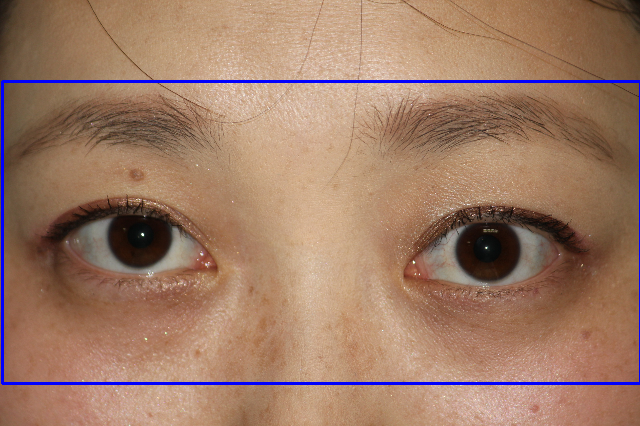

In [7]:
# image_path = image_list
# img = image_path[102]

YOLOv5_model_path = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/yolov5n_130epch.pt"

parent_dir = "/content/drive/MyDrive/Deep_learning/Olympia_dataset/for_validation/treated_640px"
img = f"{parent_dir}/970.JPG"

class_names = {0:"cont", 1:"grav"}
pred = interference(img, YOLOv5_model_path)

# output result
x1, y1, x2, y2, prob, class_num = torch.round(pred[0][0])

# probability
prob = pred[0][0][4].item()


# class
class_name = class_names[pred[0][0][5].item()]

print("Ë®∫Êñ≠„ÅØ %s„ÄÅÁ¢∫Áéá„ÅØ%.1fÔºÖ„Åß„Åô„ÄÇ" %(class_name, prob*100))

img_cv2 = cv2.imread(img) 

# Ê®™ÂπÖ„Åå640px„Å´„Å™„Çã„Çà„ÅÜ„Å´„É™„Çµ„Ç§„Ç∫
height, width, _ = img_cv2.shape
resize_width = 640
resize_height = int((height / width) * resize_width)
resize_size = (resize_width, resize_height)
img_cv2 = cv2.resize(img_cv2, resize_size)

# calculate coordinates of the bounding box (640*640„Å´padding„Åï„Çå„Å¶„ÅÑ„ÇãÂàÜ„ÅÆÂ∫ßÊ®ô„ÇíË∂≥„Åô)
img_height, img_width, _ = img_cv2.shape[:3]
print(f"img_height: {img_height}, img_width: {img_width}")
padding_x = (img_height - min(img_width, img_height))/2
padding_y = (img_width - min(img_width, img_height))/2
x1 = x1 - padding_x
y1 = y1 - padding_y
x2 = x2 - padding_x
y2 = y2 - padding_y
print(f"x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}")


# draw bounding box
cv2.rectangle(img_cv2, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

# show image
cv2_imshow(img_cv2)

#**YOLOv5Áî®„Éà„É¨„Éº„Éã„É≥„Ç∞Áî®„Éï„Ç©„É´„ÉÄ‰ΩúÊàê**

https://github.com/ykitaguchi77/GravCont_classification_colab/blob/master/Extend_dataset_YOLOv5%EF%BC%A0.ipynb

https://book.st-hakky.com/docs/object-detection-yolov5-tutorial/

In [ ]:
"""

---------------super_extend_for_YOLO_training --------train------labels
                                              |           |--images
                                              |            
                                              |------valid ----labels
                                              |           |--images
                                              |
                                              |--dataset.yaml
                                              |--yolov5                                    
"""

In [11]:
dst_path = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_for_YOLO_training"
orig_grav_path = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/train_val/grav"
orig_cont_path = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_dataset_for_YOLO/train_val/grav"

In [13]:
if os.path.exists(dst_path):
    shutil.rmtree(dst_path)
os.makedirs(dst_path)
os.makedirs(f"{dst_path}/train/images")
os.makedirs(f"{dst_path}/train/labels")
os.makedirs(f"{dst_path}/valid/images")
os.makedirs(f"{dst_path}/valid/labels")

In [ ]:
%cd dst_path

In [ ]:
%%writefile dataset.yaml
# path
train: /content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_for_YOLO_training/train/images
val: /content/drive/MyDrive/Deep_learning/GO_extended_dataset/super_extend_for_YOLO_training/valid/images

# num of classes
nc: 2

#class names
names: ['cont', 'grav'] # classÂêç„ÇíÂÆöÁæ©

In [ ]:
# split dataset

import numpy as np
from sklearn.model_selection import train_test_split
import glob
import os
import shutil

dataset_dir = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO"

# def split_dataset(dataset_dir):
#     img_list = glob.glob(f"{dataset_dir}/images/*")
#     img_train, img_test = train_test_split(img_list, test_size=0.3, random_state=0)

#     # img_train, img_test„Å´ÂêçÂâç„Åå‰∏ÄËá¥„Åô„Çãtxt„Éï„Ç°„Ç§„É´„ÇíÊäú„ÅçÂá∫„Åô
#     label_train = [f"{dataset_dir}/labels/{os.path.basename(i).split('.')[0]}.txt" for i in img_train]
#     label_test = [f"{dataset_dir}/labels/{os.path.basename(i).split('.')[0]}.txt" for i in img_test]

#     print(f"train: {len(label_train)},test: {len(label_test)}")

#     return img_train, img_test, label_train, label_test

def make_path_list(dir, class_name):
    image_list =  [file for file in glob.glob(f"{dir}/{class_name}/images/*") if os.path.isfile(file) == True ]
    label_list =  [f"{dir}/{class_name}/labels/{os.path.basename(i).split('.')[0]}.txt" for i in image_list]

    id_list = [os.path.basename(i).split("-")[0].split(".")[0] for i in image_list]
    
    index = {}
    id_idx = []
    for item in id_list:
        if item in index:
            id_idx.append(index[item])
        else:
            index[item] = len(index) + 1
            id_idx.append(index[item])
    id_idx = [int(i) for i in id_idx]

    return image_list, label_list, id_idx

grav_image_list, grav_label_list, grav_id_idx = make_path_list(dataset_dir, "grav")
cont_image_list, cont_label_list, cont_id_idx = make_path_list(dataset_dir, "cont")

print(f"grav: {len(grav_image_list)}")
print(f"cont: {len(cont_image_list)}")